# Cleaning numerical and categorical data

## 1.Import the necessary libraries

In [455]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [456]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [457]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [458]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 3.First look at its main features (head, shape, info)

In [459]:
customer_df.shape

(9134, 24)

In [460]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [461]:
# Count number of zeros in all columns of Dataframe

for column_name in customer_df.columns:
    column = customer_df[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name.upper(), ' is : ', count)

Count of zeros in column  CUSTOMER  is :  0
Count of zeros in column  STATE  is :  0
Count of zeros in column  CUSTOMER LIFETIME VALUE  is :  0
Count of zeros in column  RESPONSE  is :  0
Count of zeros in column  COVERAGE  is :  0
Count of zeros in column  EDUCATION  is :  0
Count of zeros in column  EFFECTIVE TO DATE  is :  0
Count of zeros in column  EMPLOYMENTSTATUS  is :  0
Count of zeros in column  GENDER  is :  0
Count of zeros in column  INCOME  is :  2317
Count of zeros in column  LOCATION CODE  is :  0
Count of zeros in column  MARITAL STATUS  is :  0
Count of zeros in column  MONTHLY PREMIUM AUTO  is :  0
Count of zeros in column  MONTHS SINCE LAST CLAIM  is :  314
Count of zeros in column  MONTHS SINCE POLICY INCEPTION  is :  83
Count of zeros in column  NUMBER OF OPEN COMPLAINTS  is :  7252
Count of zeros in column  NUMBER OF POLICIES  is :  0
Count of zeros in column  POLICY TYPE  is :  0
Count of zeros in column  POLICY  is :  0
Count of zeros in column  RENEW OFFER TYPE

## 4.Rename the columns so they follow the PE8 (snake case)

In [462]:
customer_df.columns = map(str.lower,customer_df.columns)
customer_df.columns = customer_df.columns.str.replace(' ','_')

In [463]:
# Checking
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## 5.Change effective to date column to datetime format

In [464]:
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'])

In [465]:
customer_df['effective_to_date'] ## Checking if the format changed

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

## 6.Check NaN values per column

In [466]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## 7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [469]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                  float64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [470]:
customer_df['income'] = customer_df['income'].astype('float64') 

In [471]:
numerical = customer_df.select_dtypes(include = ['int64','datetime64','float64'])

In [472]:
def split_numerical_discrete(df): 
    discrete = []
    continious = []
    for column in df:
        if df[column].dtype == np.int64:
            discrete.append(column)
        else:
            continious.append(column)
    return {
        'discrete_columns': discrete, 
        'continuous_columns':continious
    }
    

In [473]:
split_numerical_discrete(numerical)

{'discrete_columns': ['monthly_premium_auto',
  'months_since_last_claim',
  'months_since_policy_inception',
  'number_of_open_complaints',
  'number_of_policies'],
 'continuous_columns': ['customer_lifetime_value',
  'effective_to_date',
  'income',
  'total_claim_amount']}

In [474]:
numerical_columns = split_numerical_discrete(numerical)
discrete = numerical_columns['discrete_columns']
continuous = numerical_columns['continuous_columns']

In [475]:
numerical[discrete]

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


In [476]:
numerical[continuous]

,customer_lifetime_value,effective_to_date,income,total_claim_amount
0,2763.519279,2011-02-24,56274.0,384.811147
1,6979.535903,2011-01-31,0.0,1131.464935
2,12887.431650,2011-02-19,48767.0,566.472247
3,7645.861827,2011-01-20,0.0,529.881344
4,2813.692575,2011-02-03,43836.0,138.130879
...,...,...,...,...
9129,23405.987980,2011-02-10,71941.0,198.234764
9130,3096.511217,2011-02-12,21604.0,379.200000
9131,8163.890428,2011-02-06,0.0,790.784983
9132,7524.442436,2011-02-03,21941.0,691.200000


## 8.For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get     

## 9.Get categorical features

In [477]:
categorical = customer_df.select_dtypes(include = ['object'])

In [478]:
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [479]:
for column in categorical.columns:
    if column!='customer':
        print('*********', column.upper(), '***************')
        print(categorical[column].value_counts())
        print('---------------------------------------------')
    
        

********* STATE ***************
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
---------------------------------------------
********* RESPONSE ***************
No     7826
Yes    1308
Name: response, dtype: int64
---------------------------------------------
********* COVERAGE ***************
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
---------------------------------------------
********* EDUCATION ***************
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
---------------------------------------------
********* EMPLOYMENTSTATUS ***************
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
---------------------------------------------
********* GEN

### All 'object' types look like categorical

## 10.What should we do with the customer_id column?

In [480]:
customer_df = customer_df.set_index('customer')

In [481]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 11.Plot a correlation matrix, what can you see?

In [482]:
corr_mat = customer_df.corr(method='spearman')
corr_mat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,0.210598
income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.401598
monthly_premium_auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.522261
months_since_last_claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.000782
months_since_policy_inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,-0.006569
number_of_open_complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.024694
number_of_policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,-0.011100
total_claim_amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,-0.024694,-0.011100,1.000000


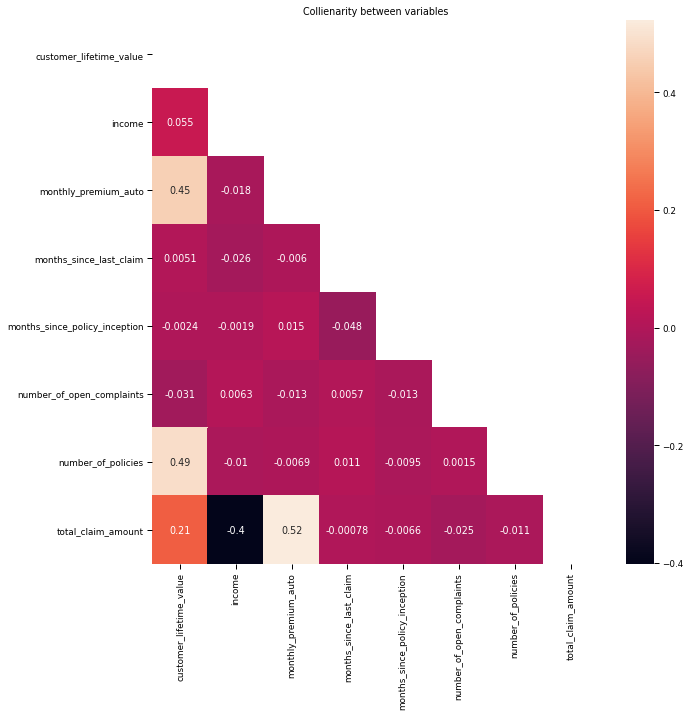

In [483]:
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 10)) 
ax = sns.heatmap(corr_mat, mask=mask, annot=True) 
ax.set_title('Collienarity between variables') 
plt.show()

## 12.Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data)

In [484]:
def plot_discrete(df):
    for column in df:
        sns.histplot(df[column])
        plt.show()

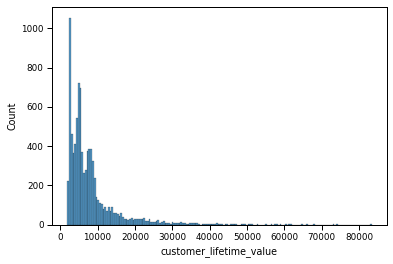

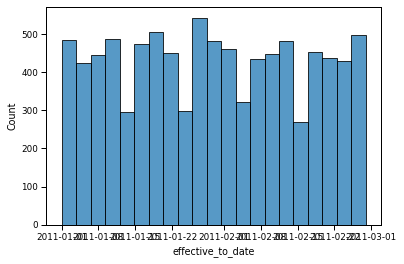

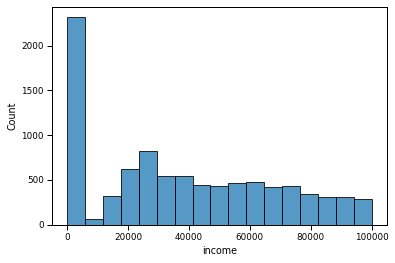

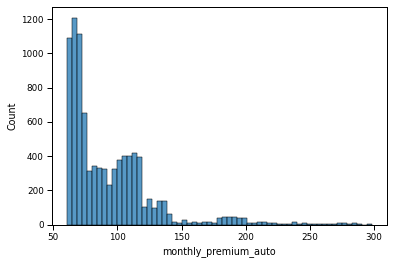

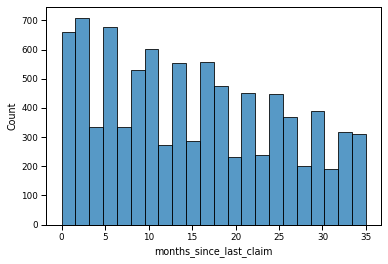

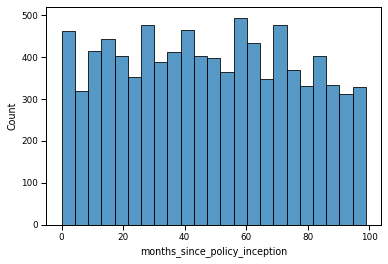

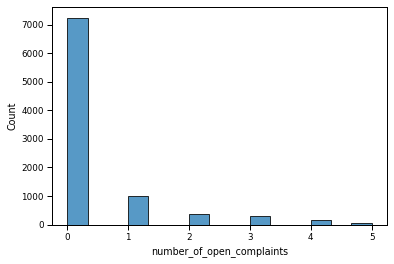

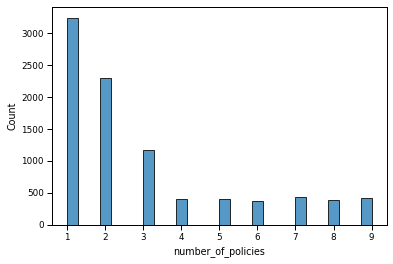

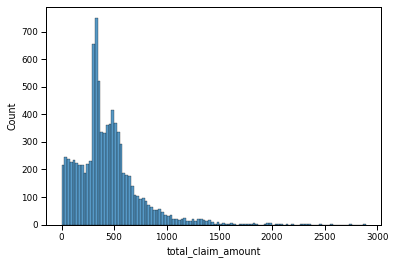

In [485]:
plot_discrete(numerical)

## 13.What can you see in the plots?

#### "Income" and "Number of Open Complaints" columns contain large amount of zeros("Income" more than 2500, "Number of Open Complaints" more than 7000).I dont know how to deal with this zeros.Maybe we could split this columns  by zeros and non-zeros."Months since last claim","Months since policy inception",'Effective to date',"Number of  policies" seem like normal distribution."Total claim amount","Customer Lifetime Value" and "Monthly Premium Auto"columns are highly skewed 

In [400]:
def plot_outliers(df):
    for column in df:
        sns.boxplot(df[column])
        plt.show()

In [488]:
df_with_outliers = numerical[['customer_lifetime_value','total_claim_amount','monthly_premium_auto']]

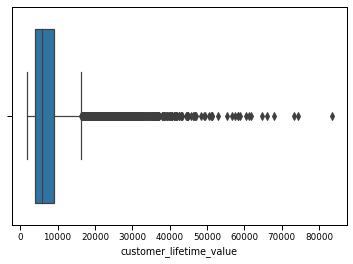

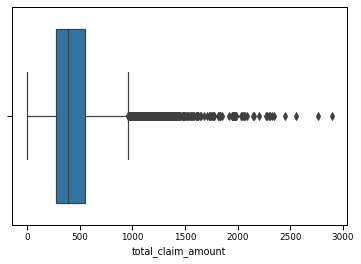

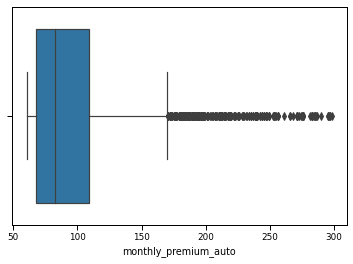

In [489]:
plot_outliers(df_with_outliers)

## 14.Have you found outliers? If you have, what should we do with them?

In [490]:
def remove_outliers(df, in_columns, threshold=1.5):
    for column in in_columns:
        upper = np.percentile(df[column],75)
        lower = np.percentile(df[column],25)
        iqr = upper - lower
        upper_limit = upper + threshold * iqr
        lower_limit = lower - threshold * iqr
        df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [493]:
df_outliers_cleaned = remove_outliers(customer_df, 
                     in_columns=columns_with_outliers.columns, 
                     threshold = 1.5
                    )

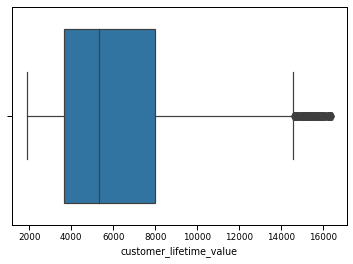

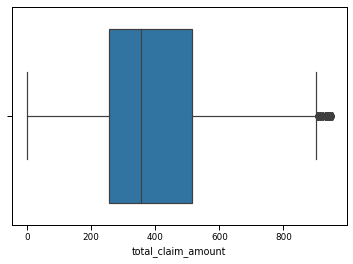

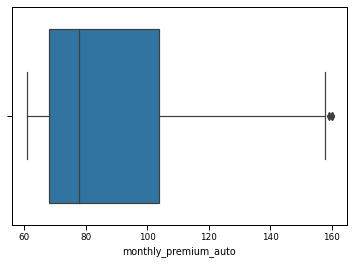

In [494]:
plot_outliers(df_outliers_cleaned[columns_with_outliers.columns])

## Cleaned dataset

In [425]:
df_outliers_cleaned.shape

(7817, 23)